In [1]:
import pandas as pd

In [79]:
out = pd.read_csv('./국민여행조사/해외여행조사.csv')
in_ = pd.read_csv('./csv_file/국민여행조사3.csv')
df_label = pd.read_csv('./csv_file/라벨링.csv')

In [30]:
in_.columns

Index(['ID', 'A2_1', 'A2_2', 'A2_3', 'A3_1', 'A3_2', 'A3_3', 'A3_4', 'A3_5',
       'A3_6', 'A3_7', 'A3_8', 'A3_9', 'A3_10', 'A3_11', 'A3_12', 'A3_13',
       'A3_14', 'A3_15', 'A3_16', 'A3_17', 'A3_18', 'A3_19', 'A3_20', 'A3_21',
       'A4_1', 'A4_2', 'A4_3', 'A4A_1', 'A4A_2', 'A4A_3', 'A12', 'A13', 'A14',
       'BSEX', 'BAGE', 'label', 'travel'],
      dtype='object')

In [31]:
out.columns

Index(['ID', 'MON_EXP_1', 'S5', 'S5A_1', 'S5A_2', 'S5A_3', 'S5A_4', 'S5A_5',
       'S5A_6', 'S5A_7',
       ...
       'DQ5AC', 'DQ5AD', 'DQ5B', 'DQ6A', 'DQ6B', 'DQ7', 'BSEX', 'BAGE', 'BARA',
       'WT_OVER'],
      dtype='object', length=400)

In [50]:
A12 = []
A13 = []
A14 = []
for i in range(len(out)):
    if out['AA12'][i] == ' ':
        continue
    else:
        A12.append(float(out['AA12'][i]))
    if out['AA13'][i] == ' ':
        continue
    else:
        A13.append(float(out['AA13'][i]))
    if out['AA14'][i] == ' ':
        continue
    else:
        A14.append(float(out['AA14'][i]))

In [51]:
A12 = sum(A12)/len(A12)
A13 = sum(A13)/len(A13)
A14 = sum(A14)/len(A14)

In [65]:
A12_2 = []
A13_2 = []
A14_2 = []
for i in range(len(out)):
    if out['AA12'][i] == ' ':
        A12_2.append(A12)
    else:
        A12_2.append(float(out['AA12'][i]))
    if out['AA13'][i] == ' ':
        A13_2.append(A13)
    else:
        A13_2.append(float(out['AA13'][i]))
    if out['AA14'][i] == ' ':
        A14_2.append(A14)
    else:
        A14_2.append(float(out['AA14'][i]))

In [75]:
out['AA12'] = A12_2
out['AA13'] = A13_2
out['AA14'] = A14_2

In [67]:
label =[]
for i in range(len(out)):
    if (out.AA12[i] + out.AA13[i] + out.AA14[i])/3 >= 4:
        label.append(1)
    else: 
        label.append(0)
out['label'] = label

In [68]:
out2 = out[['ID', 'MON_EXP_1', 'AA2_1', 'AA2_2', 'AA2_3', 'AA3_1', 'AA3_2', 'AA3_3', 'AA3_4', 'AA3_5',
       'AA3_6', 'AA3_7', 'AA3_8', 'AA3_9', 'AA3_10', 'AA3_11', 'AA3_12', 'AA3_13',
       'AA3_14', 'AA3_15', 'AA3_16', 'AA3_17', 'AA3_18', 'AA3_19', 'AA3_20', 'AA3_21',
       'AA4_1', 'AA4_2', 'AA4_3', 'AA4A_1', 'AA4A_2', 'AA4A_3', 'AA12', 'AA13', 'AA14',
       'BSEX', 'BAGE', 'label']]

In [69]:
out2 = out2[out2['MON_EXP_1'] == 1]
out2 = out2[(out2['BAGE'] == 2) | (out2['BAGE'] == 3)]
out2 = out2.reset_index(drop=True)

In [19]:
in_ = in_[(in_['BAGE'] == 2) | (in_['BAGE'] == 3)]
in_ = in_.reset_index(drop=True)

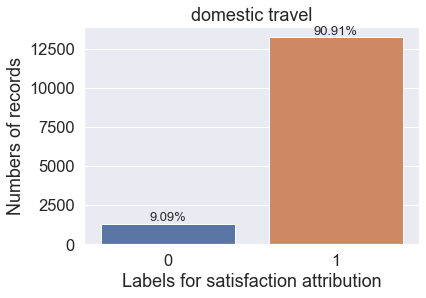

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
total_len = len(df_label.label)
sns.countplot(df_label.label).set_title('domestic travel')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+2, '{:.2f}%'.format(100*(height/total_len)), fontsize=13,
            ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel('Labels for satisfaction attribution')
ax.set_ylabel('Numbers of records')
plt.show()

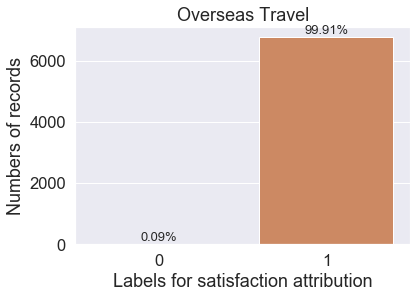

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
total_len = len(out2.label)
sns.countplot(out2.label).set_title('Overseas Travel')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+2, '{:.2f}%'.format(100*(height/total_len)), fontsize=13,
            ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel('Labels for satisfaction attribution')
ax.set_ylabel('Numbers of records')
plt.show()

In [1]:
out2.to_csv('./국민여행조사/해외여행조사.csv', index=False)

NameError: name 'out2' is not defined